<h1><center> Return Mapping Algorithm</center></h1>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy
from scipy.optimize import newton
from tqdm import tqdm

### I. New Implementation of the Return Mapping Algorithm

The following implementation holds for One-Dimensional, Rate-Independent Plasticity. Combined Isotropic/Kinematic Hardening. **Solving RMA uses Newton Method for if/else part.**

In [4]:
class RMA_newton:
    def __init__(self,strain_):
        self.strain = strain_
        self.stress = [0]
        self.epsi_p = [0]
        self.alpha  = [0]
        self.activ  = False
        
    def activate(self,E,A,b,a):
        self.activ = True
        for i in tqdm(range(len(self.strain)-1)):
            # Trial Phase
            stress_t = E * (self.strain[i+1]-self.epsi_p[i])
            epsi_p_t = self.epsi_p[i]
            alpha_t  = self.alpha[i]
            qty = (self.alpha[i]+b)**(a)
            f_t      = np.abs(stress_t) - A * qty
            if(f_t<=0):
                self.stress.append(stress_t)
                self.epsi_p.append(epsi_p_t)
                self.alpha.append(alpha_t)
            else:
                # Compute Delta_Gamma
                solutions=newton(lambda G : f_t+A*qty-E*G-A*(self.alpha[i]+b+G)**(a),0,tol=0.001,maxiter=3000)
                delta_G=np.max(np.array(solutions))
                s=np.sign(stress_t)
                self.stress.append(stress_t-E*delta_G*s)
                self.epsi_p.append(epsi_p_t+delta_G*s)
                self.alpha.append(alpha_t+delta_G) 
                
    def plot(self):
        plt.rcParams["figure.figsize"] = (12,5)
        plt.subplot(1,2,1)
        plt.plot(self.strain)
        plt.ylabel(r'$\epsilon$(t)',size=12)
        plt.xlabel(r'$t$',size=12)
        plt.title('Strain with respect to Time',size=13)
        plt.grid(True)     
        plt.subplot(1,2,2)
        plt.plot(self.strain,self.stress)
        plt.xlabel(r'$\epsilon$(t)',size=12)
        plt.ylabel(r'$\sigma$(t)',size=12)
        plt.title('Strain-Stress Diagram',size=13)
        plt.grid(True)
        plt.show()

### II. Strain between [-0.2,0.2]

**E** = 200000 MPa ; **b** = 0.001 ; **A** = 1000 MPa ; **a** = 0.2 ; Parameters characterizing Steel

In [38]:
def strain_build(N,bool_):
    stop_inc  = int(N/2)
    sig       = np.sign(float(bool_)-0.5)
    disc_time = np.array(range(N+1))
    slope1    = sig * (0.4/N)
    slope2    = - slope1
    bias      = slope1*disc_time[stop_inc]-slope2*disc_time[stop_inc]
    return np.concatenate([slope1*disc_time[0:stop_inc],bias+slope2*disc_time[stop_inc:]])

def strain_build2(N,bool_):
    disc_time = np.array(range(N+1))
    sig       = np.sign(float(bool_)-0.5)
    slope     = sig * (0.2/N)
    return slope * disc_time

def strain_build3(N):
    disc_time = np.array(range(N+1))
    return 0.2*np.sin(2*np.pi*disc_time/N)

In [39]:
E = 200000
b = 0.001
A = 1000
a = 0.2

N = 300
strain1 = strain_build(N,True)
strain2 = strain_build(N,False)
strain3 = np.concatenate([strain1,strain2])
strain4 = strain_build2(N,True)
strain5 = strain_build2(N,False)
strain6 = strain_build3(N)

In [41]:
rma1=RMA_newton(strain1)
rma2=RMA_newton(strain2)
rma3=RMA_newton(strain3)
rma4=RMA_newton(strain4)
rma5=RMA_newton(strain5)
rma6=RMA_newton(strain6)

In [42]:
rma1.activate(E,A,b,a)
rma2.activate(E,A,b,a)
rma3.activate(E,A,b,a)
rma4.activate(E,A,b,a)
rma5.activate(E,A,b,a)
rma6.activate(E,A,b,a)

100%|██████████| 300/300 [00:00<00:00, 56036.13it/s]


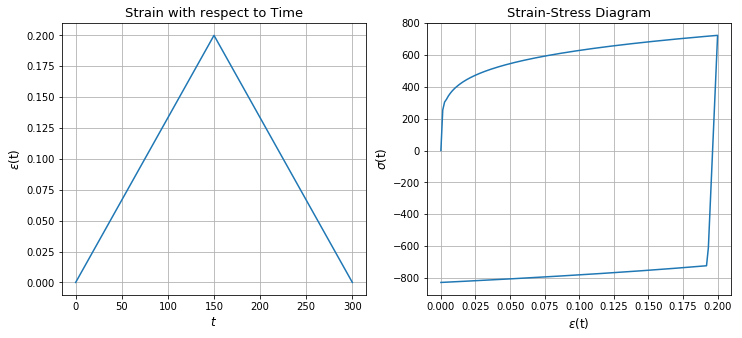

In [43]:
rma1.plot()

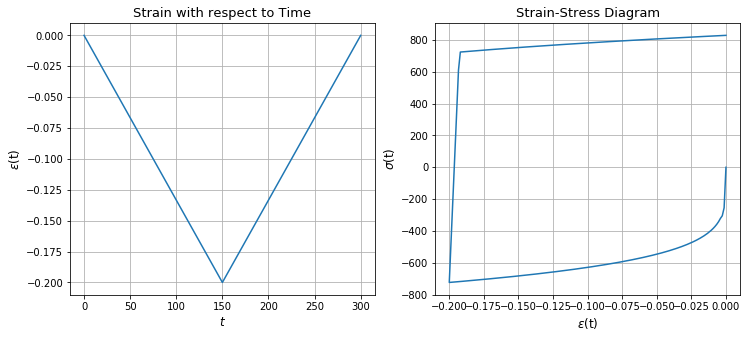

In [44]:
rma2.plot()

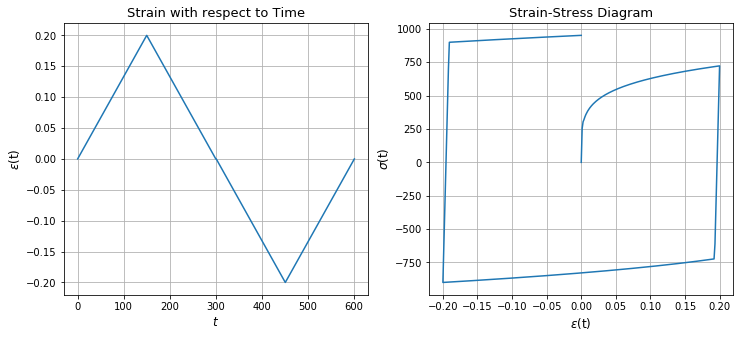

In [45]:
rma3.plot()

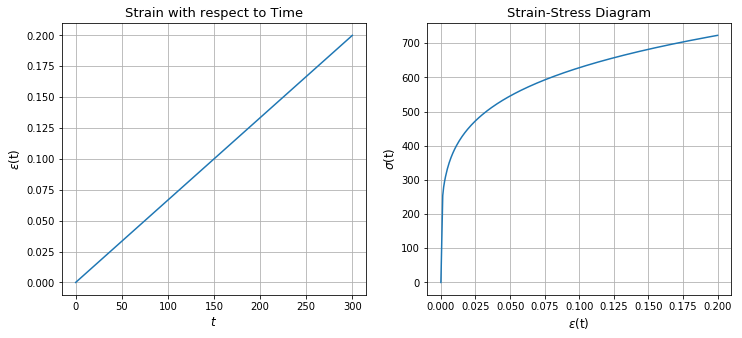

In [46]:
rma4.plot()

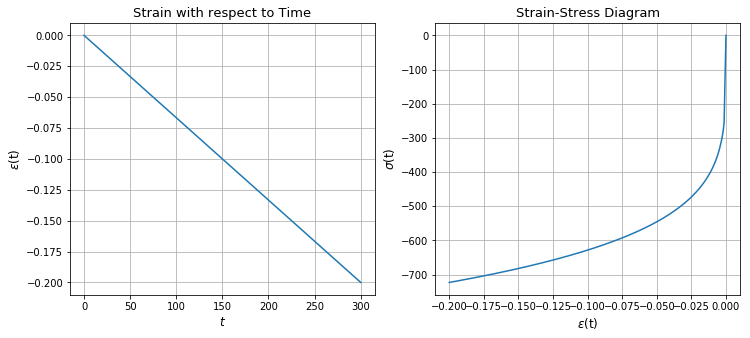

In [47]:
rma5.plot()

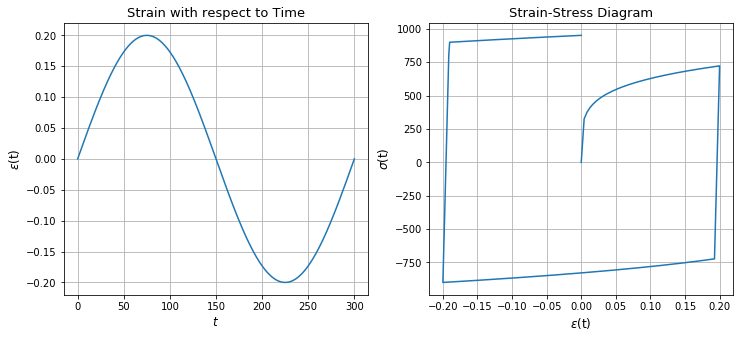

In [48]:
rma6.plot()